# Assignment 3
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

- Nama : Yusraini Nurul Asra (PYTN-KS19-017)
- Program	: Python for Data Science

## Libraries

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use(["seaborn"])
%matplotlib inline

import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from dython.nominal import identify_numeric_columns,identify_nominal_columns,associations
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from joblib import dump

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1212\1695761914.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use(["seaborn"])


In [2]:
# Membuka File dataset dengan Pandas
df = pd.read_csv('bank-additional-full.csv', sep=';')
pd.set_option('display.max_columns', None)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
print(df.isin(['unknown']).any())

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


In [4]:
df.replace("unknown",np.nan,inplace=True)

In [5]:
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
default,object,8597,20.872584,2,no
education,object,1731,4.202680,7,basic.4y
housing,object,990,2.403613,2,no
loan,object,990,2.403613,2,no
job,object,330,0.801204,11,technician
marital,object,80,0.194231,3,divorced
age,int64,0,0.000000,78,53
poutcome,object,0,0.000000,3,success
nr.employed,float64,0,0.000000,11,4991.6
euribor3m,float64,0,0.000000,316,0.876


In [6]:
df.dropna(inplace=True)

In [7]:
# Mengecek data duplikat
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [8]:
# Menggambil seluruh kolom
kolom = df.columns.tolist()

# Menghapus data duplikat yang sama persis
df = df.drop_duplicates(subset=kolom)

# Cek hasil hapus data duplikat yang sama persis
df.duplicated().sum()

# Data sudah bersih dari duplikat yang sama persis

0

In [9]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 30478 dan kolom berjumlah 21


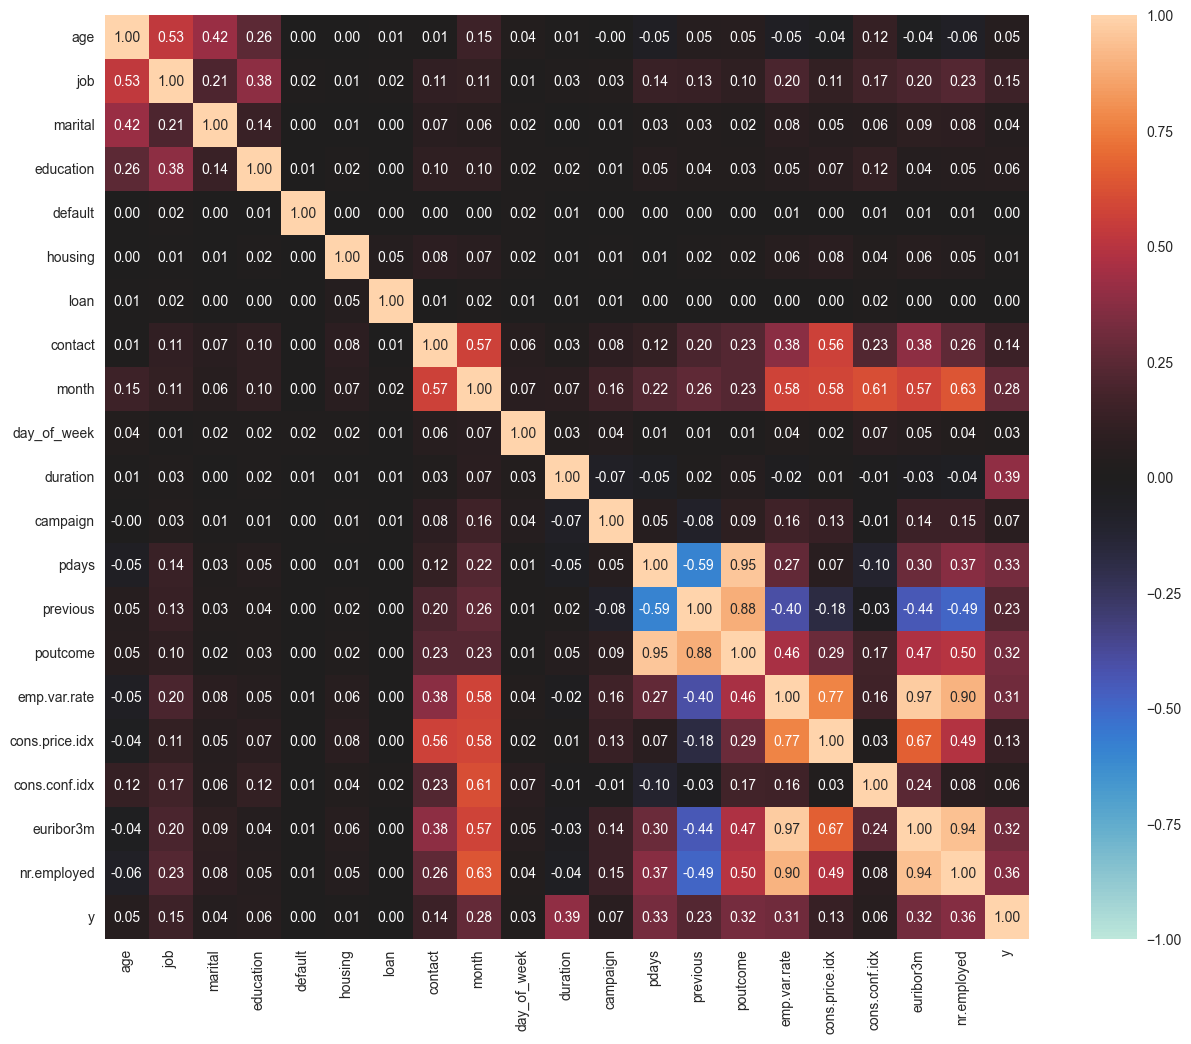

In [10]:
corr = associations(df,figsize=(16,12))

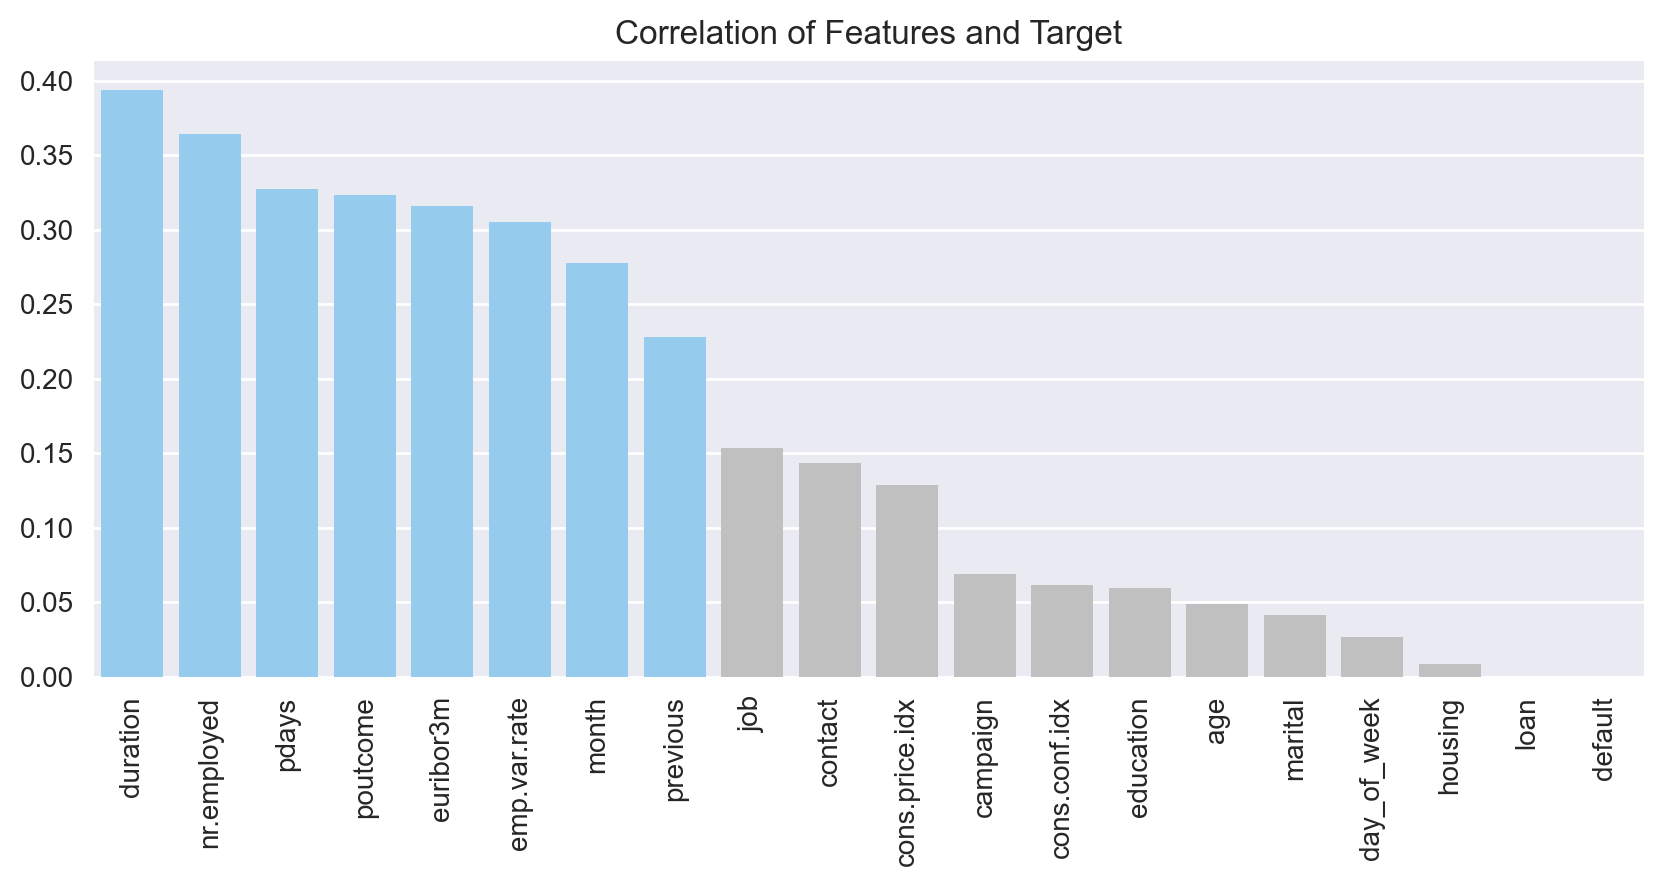

In [11]:
correlation = corr["corr"].iloc[:-1][["y"]].sort_values(by="y",ascending=False)

plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=correlation,x=correlation.index,y="y",palette=["lightskyblue" if i >= 0.2 else "silver" for i in correlation["y"]])
plt.title("Correlation of Features and Target")
plt.xticks(rotation=90)
plt.ylabel("")
plt.show()

In [12]:
# df = df[list(correlation[correlation["y"] >= 0.2].index) + ["y"]]
# df.head()

In [13]:
from dython.nominal import identify_numeric_columns,identify_nominal_columns

cat_columns,num_columns = identify_nominal_columns(df),identify_numeric_columns(df)
for i,j in zip(["Categorical Columns","Numerical Columns"],[cat_columns,num_columns]):
    print(f"{i}\t: {j}")

Categorical Columns	: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Columns	: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


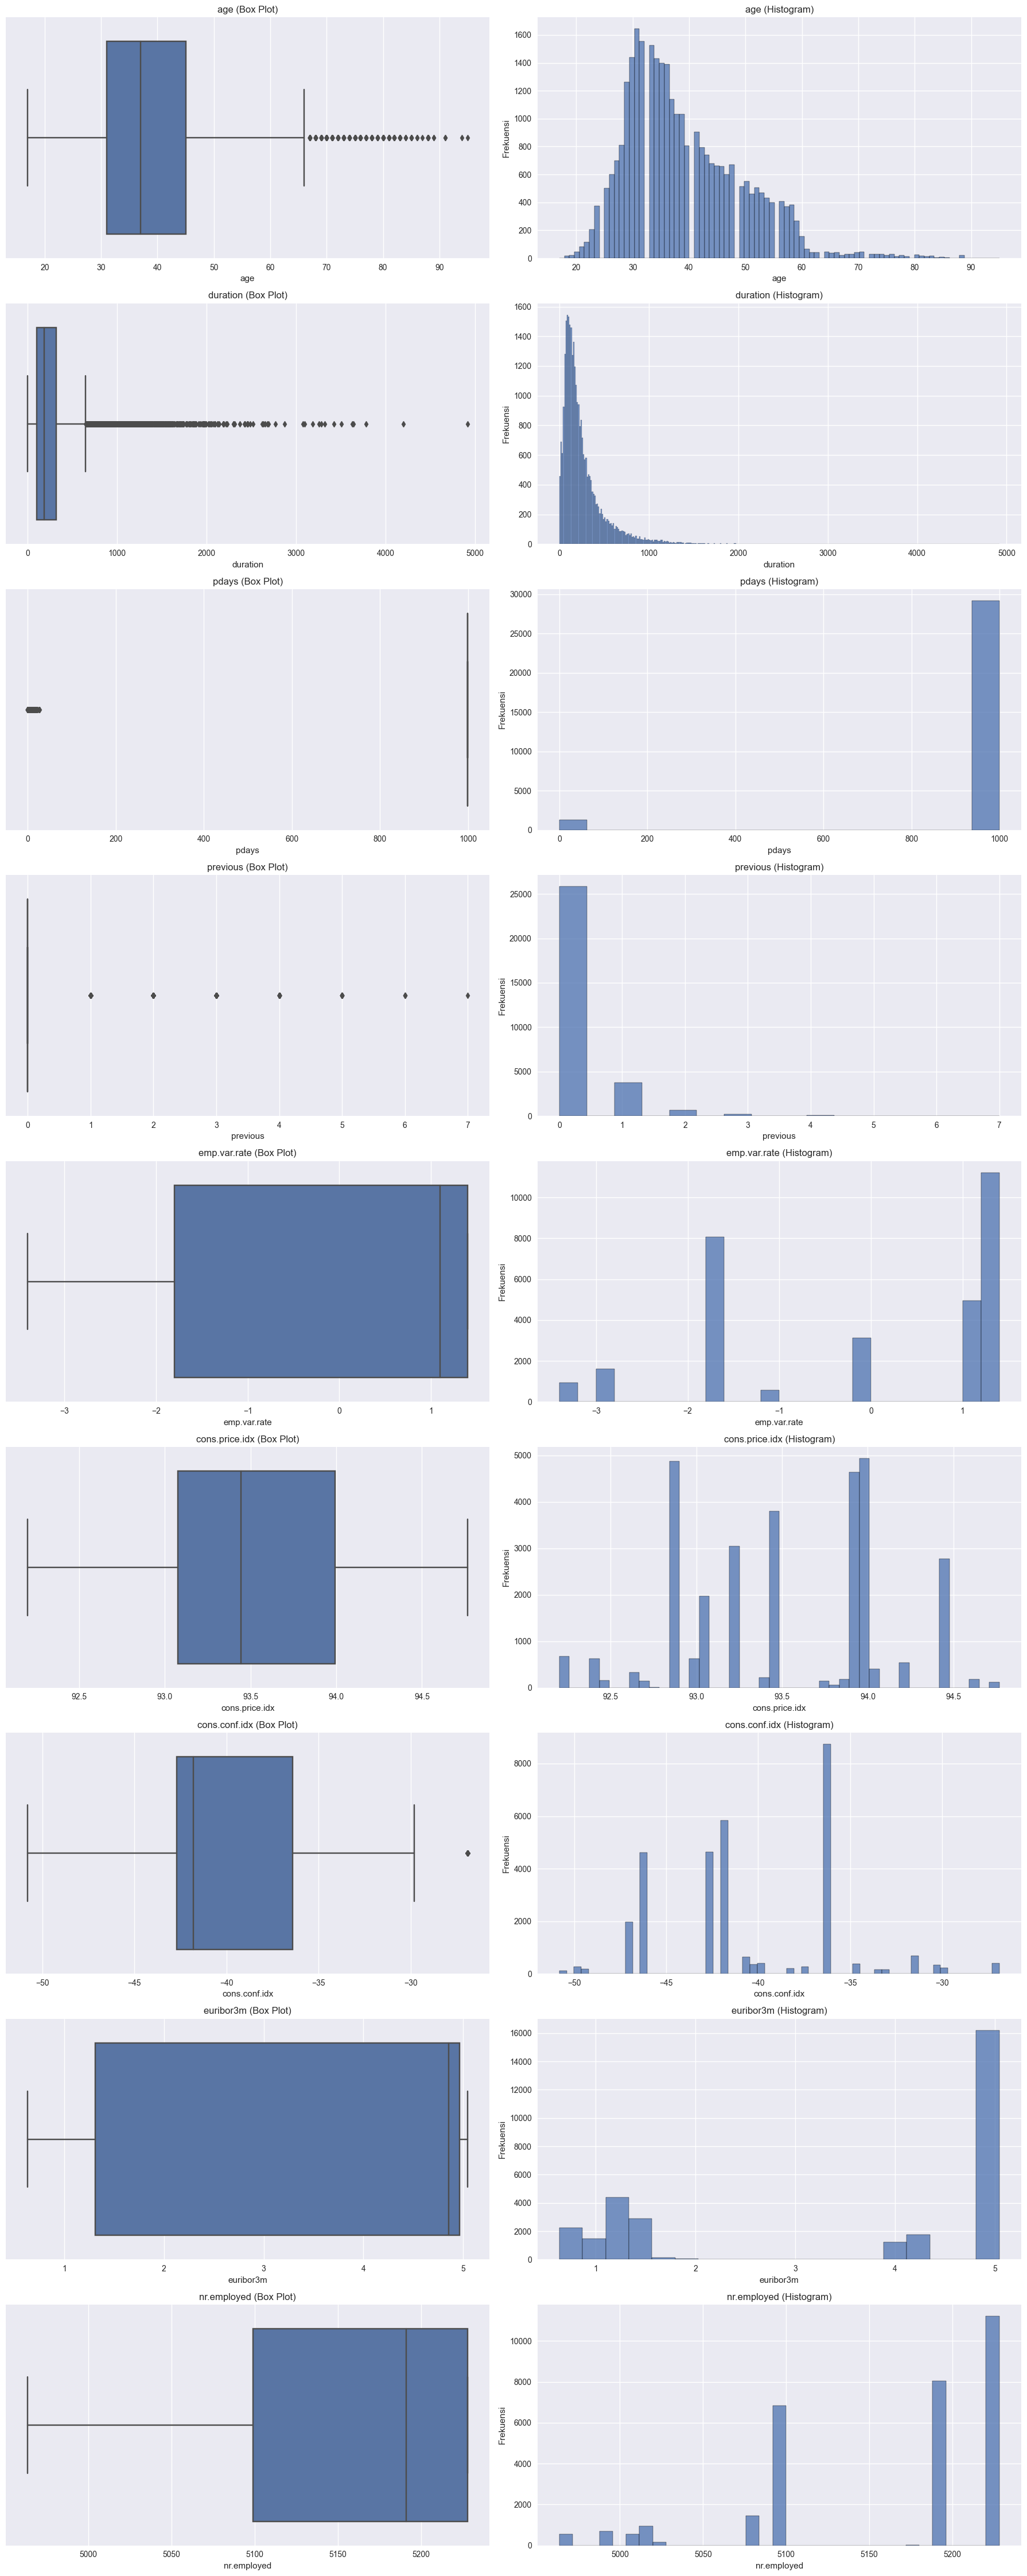

In [14]:
numeric_variables = ['age', 'duration', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

num_rows = len(numeric_variables)
num_cols = 2

plt.figure(figsize=(18, 5 * num_rows))

for i, num_var in enumerate(numeric_variables):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)
    sns.boxplot(data=df, x=num_var, orient='h')
    plt.xlabel(num_var)
    plt.title(f"{num_var} (Box Plot)")

    plt.subplot(num_rows, num_cols, i * num_cols + 2)
    sns.histplot(data=df, x=num_var, kde=False)
    plt.xlabel(num_var)
    plt.ylabel('Frekuensi')
    plt.title(f"{num_var} (Histogram)")

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


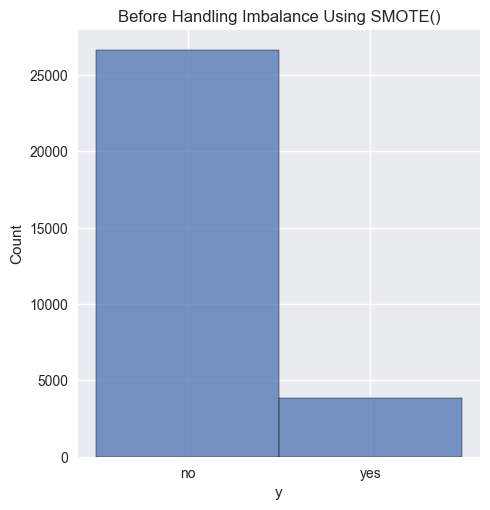

In [15]:
sns.displot(df['y'])
plt.title('Before Handling Imbalance Using SMOTE()')
plt.show()

In [16]:
LE = LabelEncoder()
X = df.drop("y",axis=1).apply(LE.fit_transform)
y = df["y"]

In [17]:
# Split dataframe menjadi data training dan data testing dengan ratio 80:20
Xtrain,X_test,ytrain,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training dataset\t: {len(Xtrain)}\t({round(len(Xtrain) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)}\t({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 24382	(80%)
Testing dataset		: 6096	(20%)


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


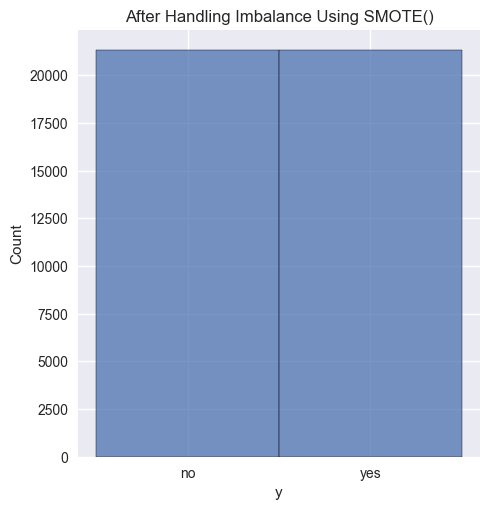

In [18]:
# Resampling menggunakan SMOTE()
smote = SMOTE(random_state=1)
X_train,y_train = smote.fit_resample(Xtrain,ytrain)

sns.displot(y_train)
plt.title('After Handling Imbalance Using SMOTE()')
plt.show()

In [19]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Preprocessing Data

## Logistic Regression

In [20]:
# Melakukan create model dan train model basic linear regression
log_model = LogisticRegression(solver="liblinear",random_state=42)
log_model.fit(scaled_X_train,y_train)

# Memprediksi price dan akan dilihat nilai R-Square scorenya
log_pred = log_model.predict(scaled_X_test)

print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

          no       0.96      0.88      0.92      5309
         yes       0.47      0.72      0.57       787

    accuracy                           0.86      6096
   macro avg       0.71      0.80      0.74      6096
weighted avg       0.89      0.86      0.87      6096

[[4669  640]
 [ 218  569]]


## K-Nearest Neighbors

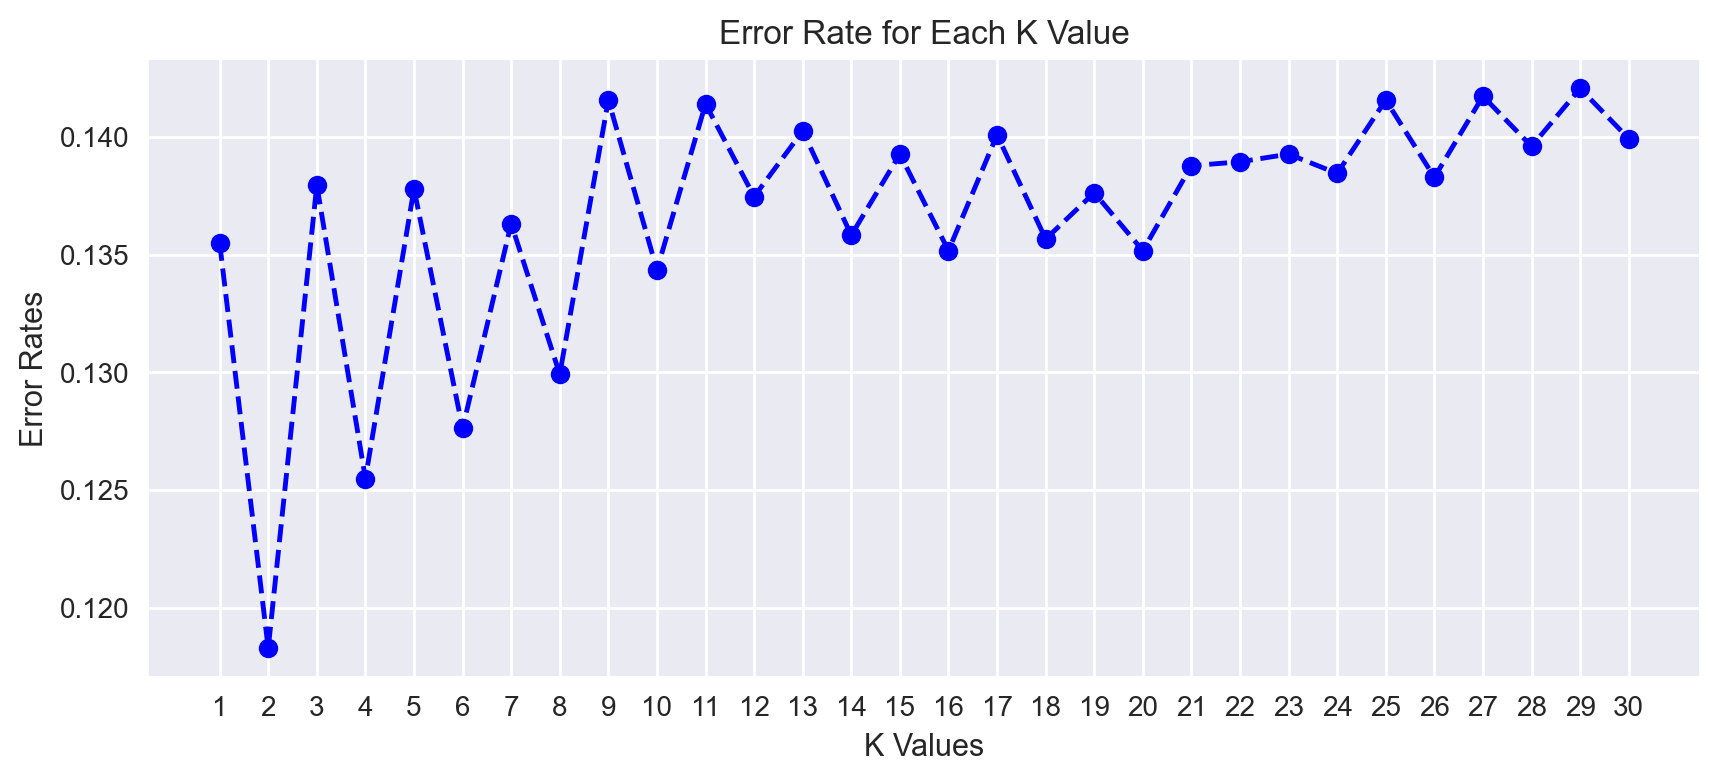

In [21]:
errors = []
for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),errors,color="blue",marker="o",ls="--")
plt.title("Error Rate for Each K Value")
plt.xlabel("K Values")
plt.xticks(range(1,31))
plt.ylabel("Error Rates")
plt.show()

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(scaled_X_train,y_train)
knn_pred = knn_model.predict(scaled_X_test)

print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

          no       0.92      0.94      0.93      5309
         yes       0.55      0.48      0.51       787

    accuracy                           0.88      6096
   macro avg       0.74      0.71      0.72      6096
weighted avg       0.88      0.88      0.88      6096

[[4999  310]
 [ 411  376]]


## Support Vector Machine

In [23]:
# Pemodelan 1 Support Vector Machine
svm_model = SVC(kernel='rbf',random_state=42)
svm_model.fit(scaled_X_train,y_train)
svm_pred = svm_model.predict(scaled_X_test)

print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

          no       0.96      0.90      0.93      5309
         yes       0.51      0.74      0.61       787

    accuracy                           0.88      6096
   macro avg       0.74      0.82      0.77      6096
weighted avg       0.90      0.88      0.89      6096

[[4763  546]
 [ 208  579]]


## Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_model.fit(scaled_X_train,y_train)
dt_pred = dt_model.predict(scaled_X_test)

print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

              precision    recall  f1-score   support

          no       0.94      0.92      0.93      5309
         yes       0.51      0.59      0.55       787

    accuracy                           0.87      6096
   macro avg       0.72      0.75      0.74      6096
weighted avg       0.88      0.87      0.88      6096

[[4859  450]
 [ 320  467]]


## Random Forest

In [25]:
rf_model = RandomForestClassifier(n_estimators=1000,random_state=42)
rf_model.fit(scaled_X_train,y_train)
rf_pred = rf_model.predict(scaled_X_test)

print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

          no       0.96      0.94      0.95      5309
         yes       0.62      0.71      0.66       787

    accuracy                           0.91      6096
   macro avg       0.79      0.82      0.80      6096
weighted avg       0.91      0.91      0.91      6096

[[4965  344]
 [ 231  556]]


## Naive Bayes

In [26]:
nb_model = BernoulliNB(alpha=1)
nb_model.fit(scaled_X_train,y_train)
nb_pred = nb_model.predict(scaled_X_test)

print(classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))

              precision    recall  f1-score   support

          no       0.94      0.73      0.82      5309
         yes       0.28      0.70      0.40       787

    accuracy                           0.73      6096
   macro avg       0.61      0.72      0.61      6096
weighted avg       0.86      0.73      0.77      6096

[[3871 1438]
 [ 234  553]]


## Confusion Matrix

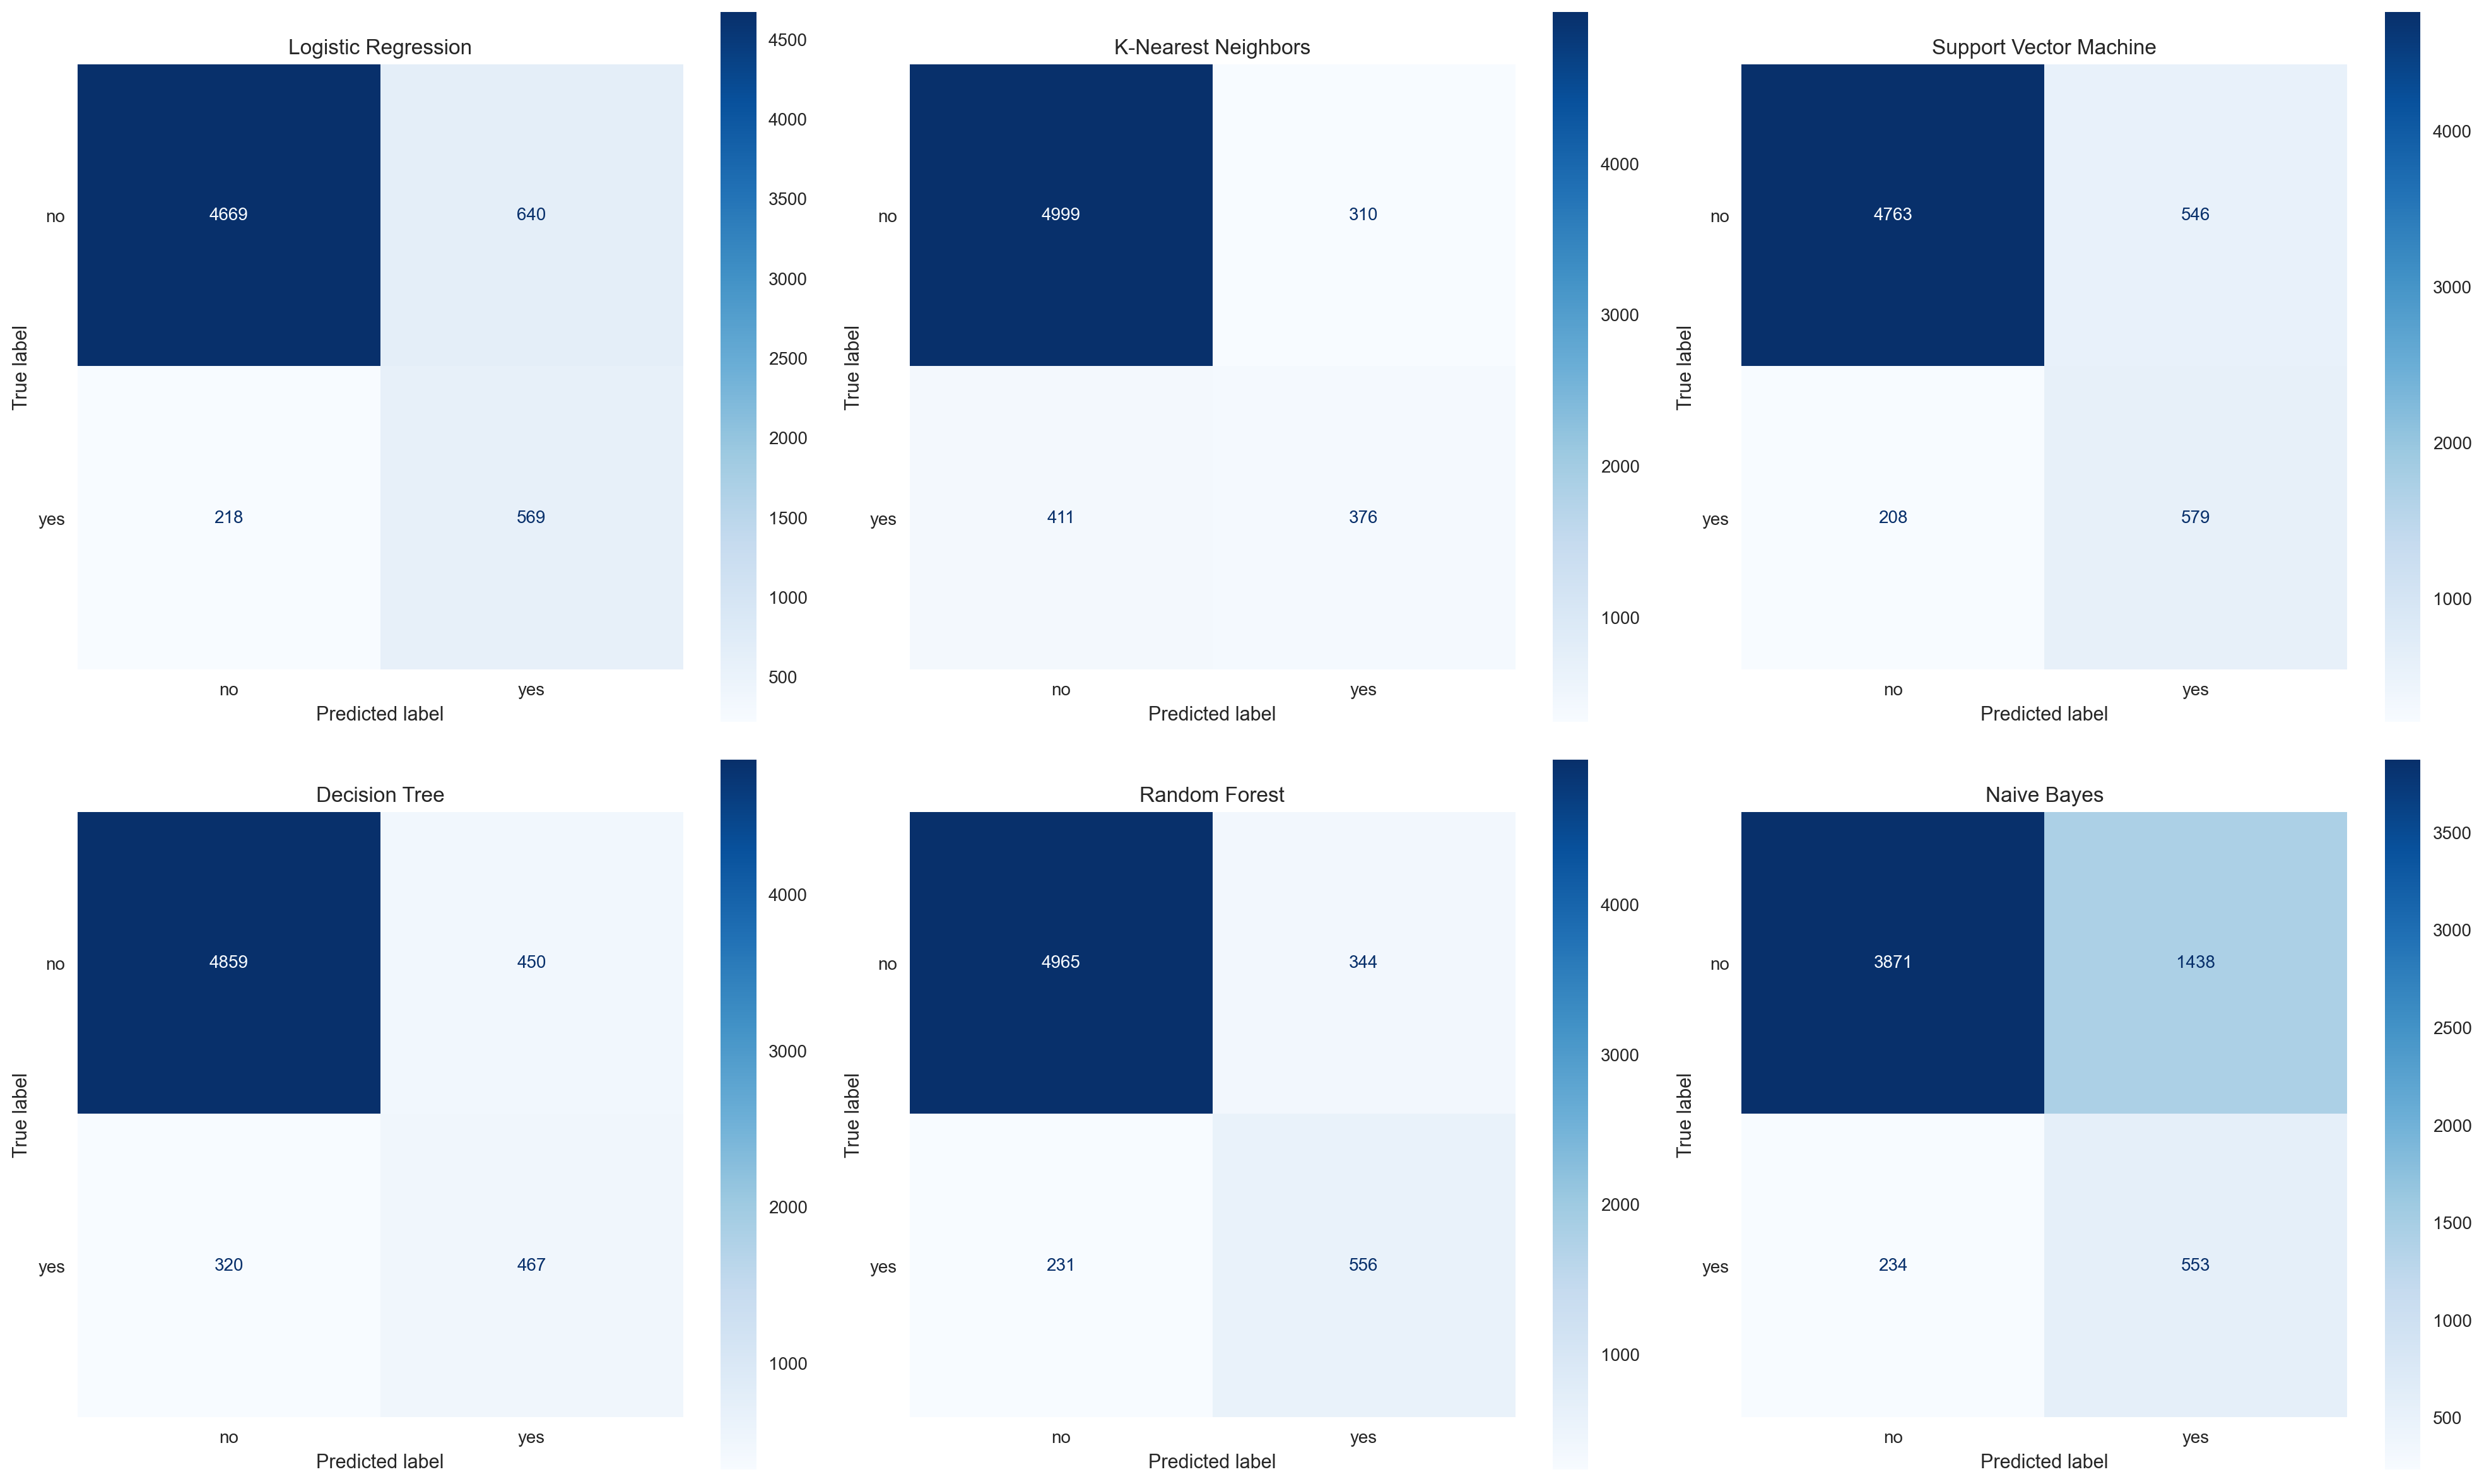

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
preds = [log_pred,knn_pred,svm_pred,dt_pred,rf_pred,nb_pred]
titles = ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Naive Bayes"]

for pred,title in zip([preds],[titles]):
    nrows,ncols = 2,3
    fig,ax = plt.subplots(nrows,ncols,figsize=(20,12),dpi=200)

    n = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            if n == len(pred):
                    break
            else:
                ConfusionMatrixDisplay.from_predictions(y_test,pred[n],cmap="Blues",ax=ax[nrow,ncol])
                ax[nrow,ncol].set_title(title[n])
                ax[nrow,ncol].grid(False)
                n += 1

    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

In [28]:
print("Logistic Regression:", round(accuracy_score(y_test, log_pred), 3))
print("KNN:", round(accuracy_score(y_test, knn_pred), 3))
print("SVM:", round(accuracy_score(y_test, svm_pred), 3))
print("Decision Tree:", round(accuracy_score(y_test, dt_pred), 3))
print("Random Forest:", round(accuracy_score(y_test, rf_pred), 3))
print("Naive Bayes:", round(accuracy_score(y_test, nb_pred), 3))


Logistic Regression: 0.859
KNN: 0.882
SVM: 0.876
Decision Tree: 0.874
Random Forest: 0.906
Naive Bayes: 0.726


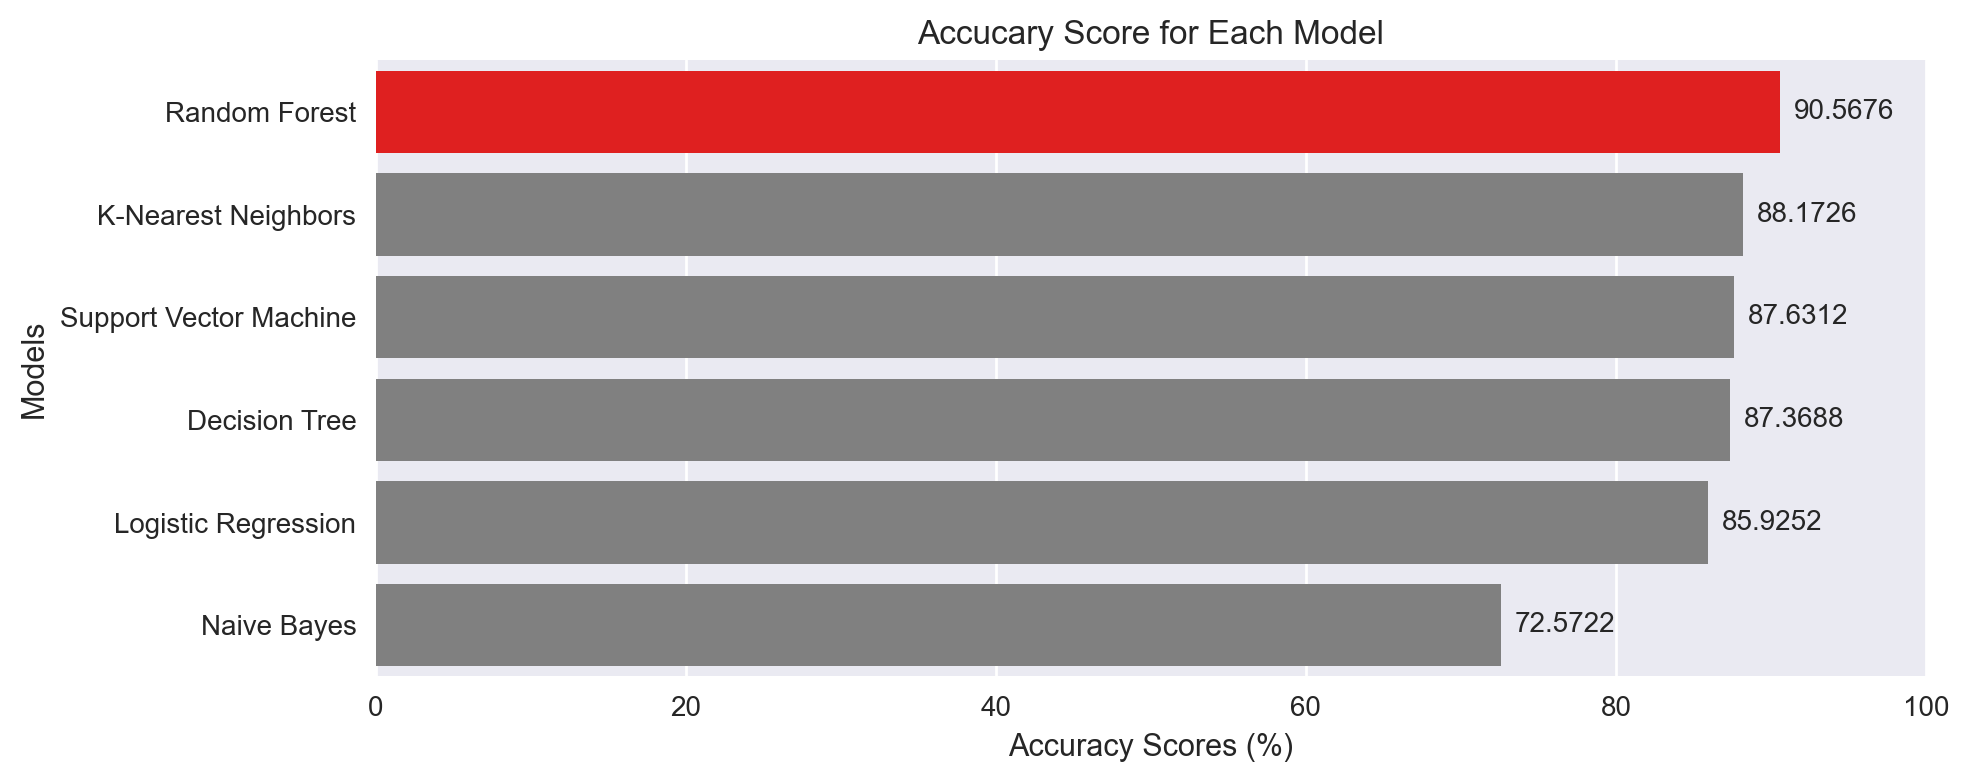

In [29]:
preds = [log_pred,knn_pred,svm_pred,dt_pred,rf_pred,nb_pred]
models = ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Naive Bayes"]

accuracy_scores = [accuracy_score(y_test,i)*100 for i in preds]

comparison = pd.DataFrame(
    data=accuracy_scores,columns=["Accuracy Scores"],index=models
).sort_values("Accuracy Scores",ascending=False)

plt.figure(figsize=(10,4),dpi=200)
barplot = sns.barplot(
    data=comparison,
    x="Accuracy Scores",
    y=comparison.index,
    orient="h",
    palette=["red" if i == comparison.head(1).iloc[0,0] else "grey" for i in comparison["Accuracy Scores"]]
)
for bars in barplot.containers:
    barplot.bar_label(bars,padding=5)
plt.title("Accucary Score for Each Model")
plt.xlabel("Accuracy Scores (%)")
plt.ylabel("Models")
plt.xlim(xmax=100)
plt.show()

## Visualization

## Preprocessing

In [30]:
people=('kode',('dev','manager'))
print(people[0])

kode
